In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, 'gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def binarize_image(image_path, threshold_value=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))
    
    if img is None:
        raise Exception("Помилка при завантаженні зображення")

    # Застосування різних методів бінаризації
    # 1. Звичайна бінарна бінаризація
    _, binary = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    
    # 2. Інверсна бінарна бінаризація
    _, binary_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)
    
    # 3. Урізана бінаризація
    _, trunc = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)
    
    # 4. Порогова бінаризація до нуля
    _, tozero = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)
    
    # 5. Інверсна порогова бінаризація до нуля
    _, tozero_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)
    
    # Відображення результатів
    titles = ['Оригінал', 'Бінарна', 'Інверсна бінарна', 'Урізана', 'До нуля', 'Інверсна до нуля']
    images = [img, binary, binary_inv, trunc, tozero, tozero_inv]
    
    show_images(images, titles)
    
    return images

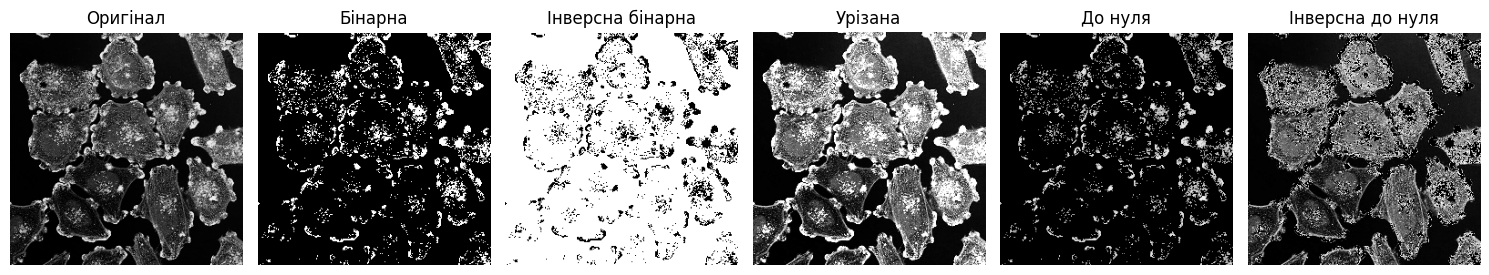

In [3]:
image_path = "sample.jpg"
    
# Встановлення порогового значення
threshold = 127
    
try:
    results = binarize_image(image_path, threshold)  
except Exception as e:
    print(f"error: {str(e)}")